<a href="https://colab.research.google.com/github/dasd412/my-first-ai/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

순차 데이터 = 텍스트나 시계열 데이터처럼 순서에 의미가 있는 데이터

---


순차 데이터는 순서를 유지하며 신경망에 주입해야 한다.


---
피드포워드 신경망 = 입력 데이터의 흐름이 앞으로만 전달되는 신경망 (완전 연결 신경망 , 합성곱 신경망)


---

순환 신경망(RNN) = 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리를 추가함. 이전 샘플에 대한 메모리를 가짐.



In [1]:
from tensorflow.keras.datasets import imdb

(train_input,train_target),(test_input,test_target)=imdb.load_data(num_words=300)

In [2]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20]) # 해결할 문제는 리뷰가 긍정인지 부정인지 판단하는 것

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split

train_input,val_input, train_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [8]:
# 각 리뷰의 길이를 계산해 넘파이 배열에 담기
# 평균적인 리뷰의 길이, 가장 짧은 리뷰의 길이, 가장 긴 리뷰의 길이를 확인하기 위함

import numpy as np

lengths=np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


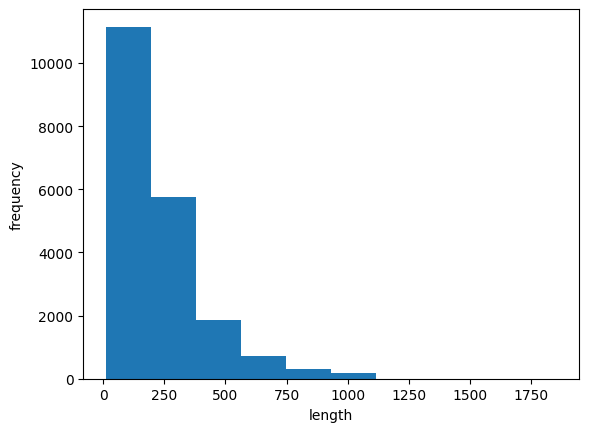

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)

plt.xlabel('length')
plt.ylabel('frequency')

plt.show()

In [11]:
# 시퀀스의 길이를 100으로 일정하게 맞추기 (100 넘으면 자르고, 100 이하면 패딩 추가)

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq=pad_sequences(train_input,maxlen=100)

In [12]:
print(train_seq.shape)

(20000, 100)


In [13]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [14]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
val_seq=pad_sequences(val_input,maxlen=100)

In [17]:
from tensorflow import keras

model=keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,300))) # 300인 이유는 입력 길이 300에 대해 원-핫 인코딩을 적용했기 때문.
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [18]:
train_oh=keras.utils.to_categorical(train_seq)

In [19]:
print(train_oh.shape)

(20000, 100, 300)


In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [21]:
print(np.sum(train_oh[0][0]))

1.0


In [22]:
val_oh=keras.utils.to_categorical(val_seq)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=50, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
313/313 [==============================] - 12s 35ms/step - loss: 0.7047 - accuracy: 0.4961 - val_loss: 0.7005 - val_accuracy: 0.4976
Epoch 2/50
  6/313 [..............................] - ETA: 7s - loss: 0.6985 - accuracy: 0.5026

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 11s 34ms/step - loss: 0.6990 - accuracy: 0.5018 - val_loss: 0.6970 - val_accuracy: 0.5070
Epoch 3/50
313/313 [==============================] - 9s 29ms/step - loss: 0.6953 - accuracy: 0.5109 - val_loss: 0.6942 - val_accuracy: 0.5142
Epoch 4/50
313/313 [==============================] - 9s 30ms/step - loss: 0.6904 - accuracy: 0.5306 - val_loss: 0.6885 - val_accuracy: 0.5346
Epoch 5/50
313/313 [==============================] - 9s 30ms/step - loss: 0.6821 - accuracy: 0.5635 - val_loss: 0.6812 - val_accuracy: 0.5658
Epoch 6/50
313/313 [==============================] - 10s 32ms/step - loss: 0.6734 - accuracy: 0.5921 - val_loss: 0.6722 - val_accuracy: 0.5880
Epoch 7/50
313/313 [==============================] - 10s 31ms/step - loss: 0.6632 - accuracy: 0.6210 - val_loss: 0.6638 - val_accuracy: 0.6120
Epoch 8/50
313/313 [==============================] - 10s 32ms/step - loss: 0.6522 - accuracy: 0.6398 - val_loss: 0.6512 - val_accuracy: 0.6396
Epoch 

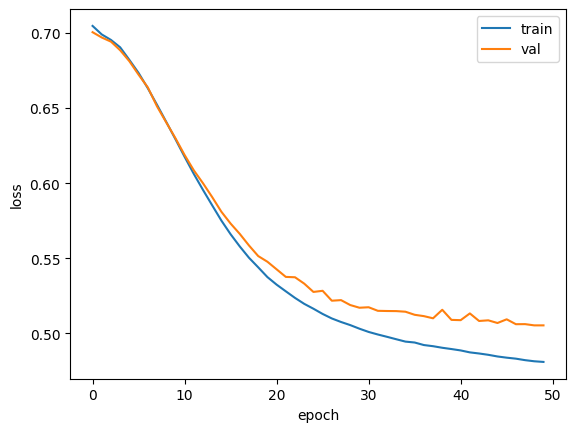

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])

plt.show()

In [26]:
# 원 - 핫 인코딩의 단점은 입력데이터가 엄청 커진 다는 것이다.
# word를 500으로 했었더니 사용가능한 RAM을 모두 소진했다고 나왔다. 그래서 300으로 줄였음.

print(train_seq.nbytes,train_oh.nbytes)

8000000 2400000000


In [28]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(300,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [29]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           4800      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=50, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
313/313 [==============================] - 9s 22ms/step - loss: 0.6926 - accuracy: 0.5149 - val_loss: 0.6913 - val_accuracy: 0.5298
Epoch 2/50
  7/313 [..............................] - ETA: 5s - loss: 0.6931 - accuracy: 0.5045

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 9s 29ms/step - loss: 0.6839 - accuracy: 0.5837 - val_loss: 0.6808 - val_accuracy: 0.6036
Epoch 3/50
313/313 [==============================] - 7s 23ms/step - loss: 0.6737 - accuracy: 0.6299 - val_loss: 0.6715 - val_accuracy: 0.6390
Epoch 4/50
313/313 [==============================] - 7s 23ms/step - loss: 0.6623 - accuracy: 0.6630 - val_loss: 0.6604 - val_accuracy: 0.6642
Epoch 5/50
313/313 [==============================] - 8s 26ms/step - loss: 0.6507 - accuracy: 0.6808 - val_loss: 0.6489 - val_accuracy: 0.6840
Epoch 6/50
313/313 [==============================] - 7s 22ms/step - loss: 0.6394 - accuracy: 0.6963 - val_loss: 0.6388 - val_accuracy: 0.6980
Epoch 7/50
313/313 [==============================] - 8s 26ms/step - loss: 0.6288 - accuracy: 0.7057 - val_loss: 0.6297 - val_accuracy: 0.7002
Epoch 8/50
313/313 [==============================] - 7s 22ms/step - loss: 0.6183 - accuracy: 0.7153 - val_loss: 0.6206 - val_accuracy: 0.7094
Epoch 9/50

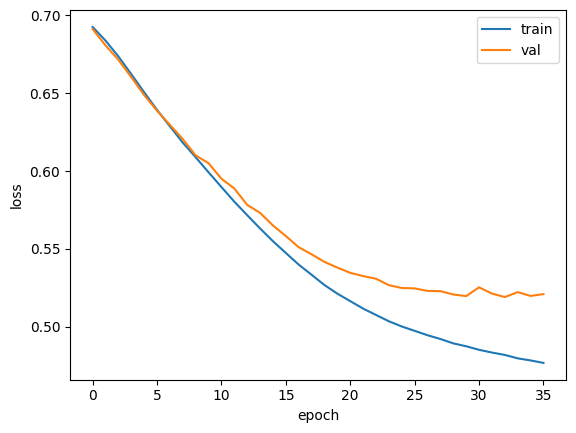

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])

plt.show()